In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris

In [153]:
iris=load_iris()

In [154]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [155]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [156]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [157]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


In [158]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [159]:
print(iris['data'].shape)

(150, 4)


In [160]:
from sklearn.model_selection import train_test_split

In [161]:
xtrain,xtest,ytrain,ytest=train_test_split(iris['data'],iris['target'],random_state=0,test_size=0.3)

In [162]:
xtrain.shape

(105, 4)

In [163]:
xtest.shape

(45, 4)

In [164]:
ytrain.shape

(105,)

In [165]:
ytest.shape

(45,)

In [166]:
from sklearn.neighbors import   KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=10)

In [167]:
ypred=knn.predict(xtest)

In [168]:
ypred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [169]:
ytest

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [170]:
knn.score(xtest,ytest)

0.9777777777777777

In [171]:
x_new=np.array([[2.2,6.8,6.4,10]])
pred=knn.predict(x_new)

In [172]:
pred

array([2])

In [173]:
print(iris['target_names'][pred])

['virginica']


In [174]:
from sklearn import datasets

In [175]:
wine=datasets.load_wine()

In [176]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [177]:
xtrain,xtest,ytrain,ytest=train_test_split(wine['data'],wine['target'],random_state=0,test_size=0.3)

In [178]:
xtrain.shape 


(124, 13)

In [179]:
xtest.shape

(54, 13)

In [180]:
ytrain.shape

(124,)

In [181]:
ytest.shape

(54,)

In [182]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [183]:
knn.score(xtest,ytest)

0.7222222222222222

In [184]:
k_range=range(1,50)
score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    score.append(knn.score(xtest,ytest))

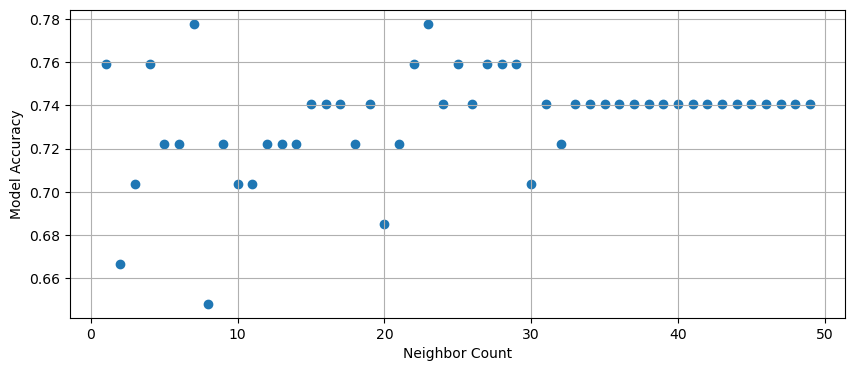

In [185]:
plt.figure(figsize=(10,4))
plt.xlabel("Neighbor Count")
plt.ylabel("Model Accuracy")
plt.scatter(k_range,score)
plt.grid()
plt.show()